<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachinLarning/blob/main/RandomForestClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
import os




In [26]:
# 1. Datasetni yuklab olish
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")
file_path = os.path.join(path, "student_depression_dataset.csv")



In [27]:
# CSV faylni o‘qish
data = pd.read_csv(file_path)

In [28]:
# 2. ID ustunini olib tashlash
data_cleaned = data.drop("id", axis=1)



In [29]:
# 3. Sleep Duration ni raqamga aylantirish
def convert_sleep_duration(val):
    val = str(val).strip("'")  # qo‘shtirnoqlardan tozalash
    if 'Less than 5' in val:
        return 4.5
    elif '5-6' in val:
        return 5.5
    elif '7-8' in val:
        return 7.5
    elif 'More than 8' in val:
        return 9
    else:
        return np.nan  # noma’lum qiymat

data_cleaned["Sleep Duration"] = data_cleaned["Sleep Duration"].apply(convert_sleep_duration)



In [30]:
# 4. Bo‘sh qiymatlarni to‘ldirish
data_cleaned = data_cleaned.fillna(method='ffill')




<ipython-input-30-a4684a15adf9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned = data_cleaned.fillna(method='ffill')


In [31]:
# 5. Kategorik ustunlarni raqamlashtirish
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le



In [32]:
# 6. X va y ni ajratish
X = data_cleaned.drop("Depression", axis=1)
y = data_cleaned["Depression"]



In [33]:
# 7. Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# 8. Random Forest modelini qurish
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [35]:
# 9. Bashorat qilish
y_pred = model.predict(X_test)



In [36]:
# 10. Natijalarni chiqarish
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8283461745206953

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



In [37]:
# 11. Muhim xususiyatlar grafigi
importances = model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



<ipython-input-38-46b4cf254e4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


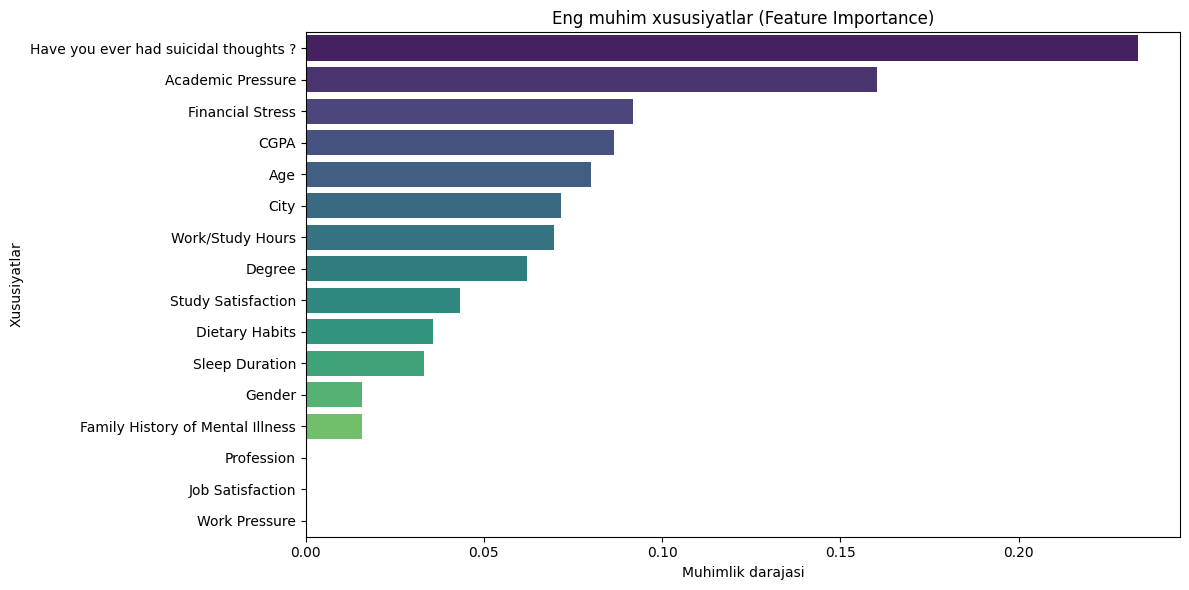

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Eng muhim xususiyatlar (Feature Importance)")
plt.xlabel("Muhimlik darajasi")
plt.ylabel("Xususiyatlar")
plt.tight_layout()
plt.show()